# Example Python Workflow to process South Padre Waves Data
In this Jupyter Notebook, I outline the general process for loading the ADCP data from the South Padre Island sediment study. 

## Source Data:##
Engel, F.L., Hartmann, C.A., Petri, B.L., Bryan, P.W., Ockerman, D.J., and Schnoebelen, D.J., 2020, Oceanographic Observations made near South Padre Island, Texas, as Part of the South Padre Island Beach Replenishment Project; August 2018–February 2019: U.S. Geological Survey data release, https://doi.org/10.5066/P9HDIZOC.

## Abstract ##
Beaches and water recreation are important to the South Padre Island, Texas area and across the United States. The movement of sediment in channels along beaches and the nearshore environment is important for coastal stakeholders and resource managers. Sediment removed by maintenance dredging is often placed back into the littoral system for potential beach replenishment. The movement of sediment from offshore berms to onshore beaches is not well known. Sediment transport is highly dependent on local current conditions and seasonal conditions. The U.S. Geological Survey, in cooperation with the City of South Padre Island, completed an oceanographic field study from August 2018 to February 2019 to investigate the potential for beach replenishment by associated dredge material placed just offshore of South Padre Island, Texas. This data release documents that data that were collected during the study.

## Purpose ##
This dataset provides the data  that were obtained during an oceanographic field study from August 2018 to February 2019 to investigate the potential for beach replenishment by associated dredge material placed just offshore of South Padre Island, Texas. A Teledyne Oceanscience Barnacle53 trawl-resistant frame-mounted acoustic Doppler current profiler (ADCP) was deployed to the seabed approximated 1-mile (1.61-kilometers) offshore, east of the coast line. The ADCP was deployed to measure surface waves, pressure, and current velocity. The measurements will be used to explore the oceanographic and sediment-transport processes responsible for the movement and distribution of sand  along under-water ridges (shoals) that runs parallel to the shore near South Padre Island, Texas. The background and experimental setup are described in the extended abstract "Monitoring Hydroacoustic Flow and Tracers of Offshore Dredge Material near South Padre Island,
Texas", on line at: https://www.sedhyd.org/2019/openconf/modules/request.php?module=oc_program&amp;action=view.php&amp;id=244&amp;file=1/244.pdf.
More information about the Baracle53 mount can be found on line at: http://www.teledynemarine.com/Lists/Downloads/seafloor_platforms_specsheet.pdf

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy
from math import pi
from windrose import WindroseAxes
from datetime import datetime

# Load wave stats data from barnacle data

This is for all the data we have for the banacle. 
- Start date and time: Aug 13, 2018 13:03
- End date and time: Feb 11, 2019 23:40

The library I am using to make the plots requires a certain field/column names, since it's designed to work with wind speed and direction. But, in actuality, we are plotting _wave height_ in meters, against _wave direction_ in compass heading. 

The easiest way to load the data is to use Pandas and create a dataframe:

In [40]:
df = pd.read_csv('whV0001.waves.20180813.20180322.csv', converters= {'Datetime': pd.to_datetime})
df = df.set_index('Datetime')
df

,Burst Number,wh_4061,wp_4060,wp_peak,wvdir
Datetime,,,,,
2018-08-13 13:03:00,1,NaN,NaN,NaN,NaN
2018-08-13 14:03:00,2,0.89,4.6,6.7,116.0
2018-08-13 15:03:00,3,0.95,4.8,6.7,108.0
2018-08-13 16:03:00,4,0.96,4.9,6.1,110.0
2018-08-13 17:03:00,5,0.85,4.7,6.1,121.0
...,...,...,...,...,...
2019-02-11 19:40:00,4371,1.03,5.1,6.7,NaN
2019-02-11 20:40:00,4372,0.72,5.9,5.1,NaN
2019-02-11 21:40:00,4373,0.96,5.2,5.6,NaN


Once we have that dataframe, we can redefine a couple of the variables so that the Windrose package can "see" them. To check we are working correctly, lets also plot a simple timeseries of significant wave heights.

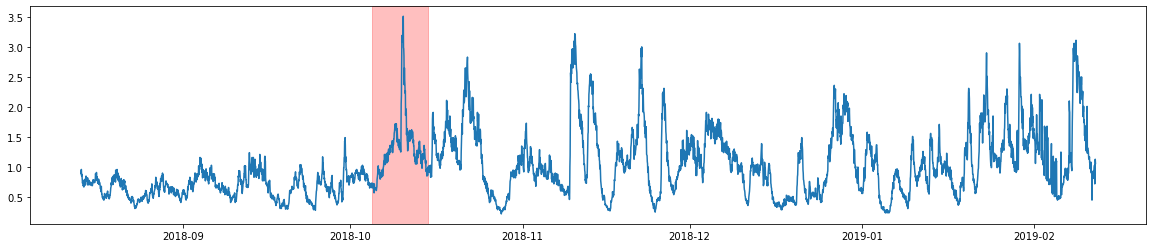

In [63]:
df['speed'] = df['wh_4061']
df['direction'] = df['wvdir']

fig, ax1 = plt.subplots(figsize=(20, 4))
ax1.plot(df.wh_4061)

# Highlight the storm event plotted below
plt.axvspan(datetime(2018,10,5), datetime(2018,10,15), color='red', alpha=0.25)

# Waverose in normalized percent (histogram)
Now we can run the wave rose plotting functions. See the documentation for the windrose package over on PyPi, or better yet the [windrose docs](https://windrose.readthedocs.io/en/latest/) page.


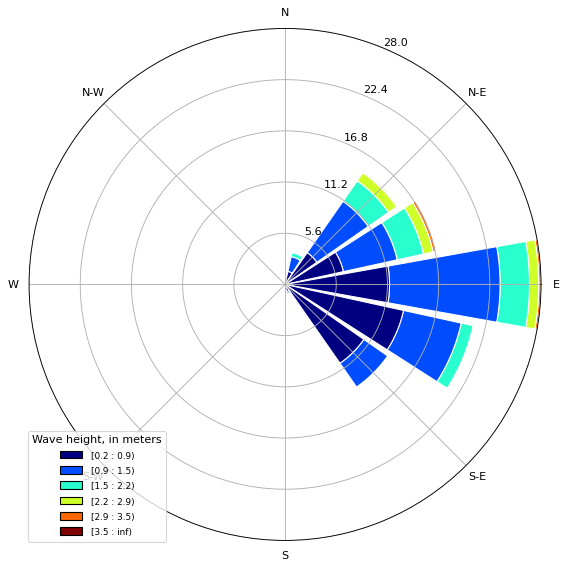

In [44]:
ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.speed, normed=True, opening=0.9, edgecolor='white')
ax.set_legend(title="Wave height, in meters", loc="lower left")

## Interpretation
Clearly, all waves come from the east in gerneral. Larger waves, corresponding to storm events are only coming the the N-E quadrant, with most of the larger waves (greater than 2.2 m) coming from NE or N-NE. No waves larger than 1.5 meters occured from the E-SE to South quadrant.

We can also create histograms of the variables pretty easily:

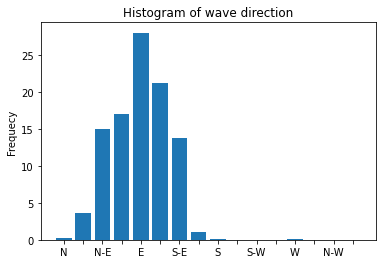

In [45]:
ax.bar(df.direction, df.speed, normed=True, nsector=16)
table = ax._info['table']
wd_freq = np.sum(table, axis=0)

direction = ax._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xlabels)
plt.gca().set_ylabel('Frequecy')
plt.gca().set_title('Histogram of wave direction')
plt.draw()

It may be that you want to create a waverose diagram for a specific storm event. To do so, the code is essentially identical, but you first need to "slice" the dataframe to only look at the data range you are interested in. For example, this waverose looks only at a storm that occured from about Oct 18 to Oct 25 2018:


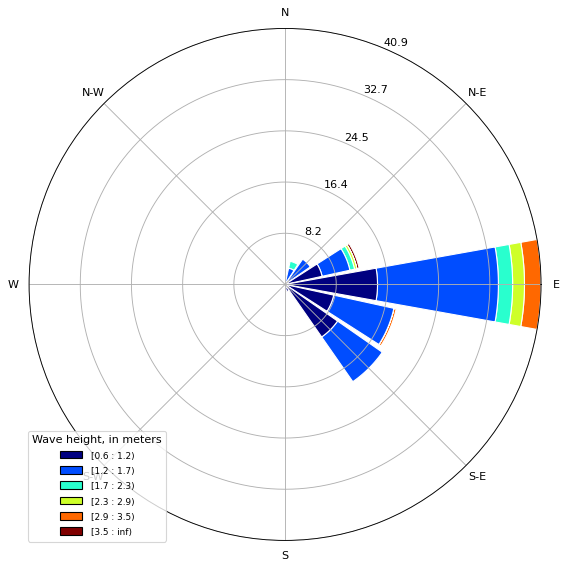

In [64]:
start = '20181005'
end = '20181015'

ax = WindroseAxes.from_ax()
ax.bar(df.direction[start:end], df.speed[start:end], normed=True, opening=0.9, edgecolor='white')
ax.set_legend(title="Wave height, in meters", loc="lower left")

Finally, the windrose package also offers some built in functionality to generate probability density functions (weibull distribution). This may not be useful for all cases, but here's how to do it in case the need arises.

d:\virtual-environments\south-padre-island\lib\site-packages\windrose\windrose.py:697: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(var, bins=bins, normed=True)


(1, 2.0266361870838723, 0, 1.144561347968422)


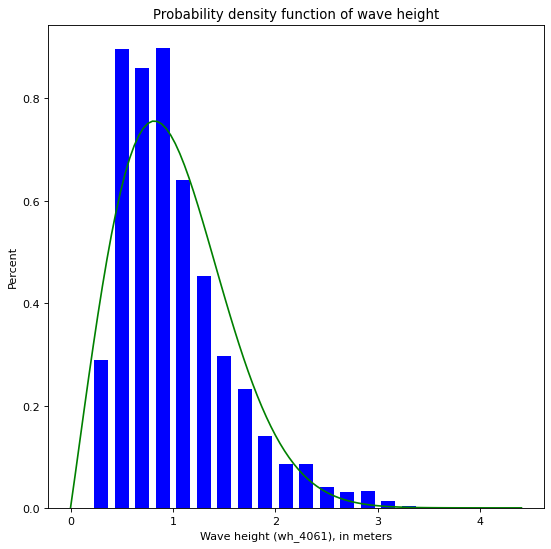

In [13]:
#from windrose import WindAxes
ax = WindAxes.from_ax()
bins = np.arange(0, 3.5 + 1, 0.2)  # ranged by wave height
bins = bins[1:]
df2 = df.dropna()
ax, params = ax.pdf(df2.speed, bins=bins)
ax.set_title('Probability density function of wave height')
ax.set_xlabel('Wave height (wh_4061), in meters')
ax.set_ylabel('Percent')
print(params)